/tmp/ipykernel_72179/3281159810.py:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='function_name', y='exec_time', data=plot_data, hue='cpu',ax=axs,ci=None,palette=palette, width=0.95)


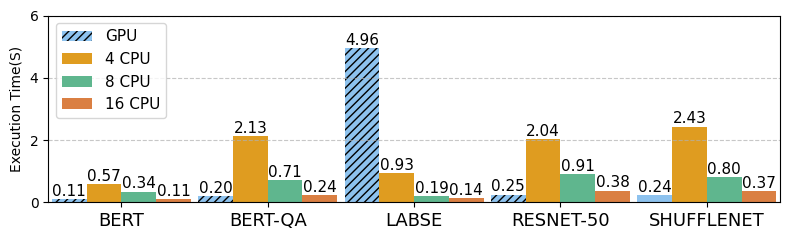

In [1]:
import seaborn as sns

import matplotlib.pyplot as plt

import pandas as pd

import numpy as np

df = pd.read_csv('function_profile.csv').fillna(0)

fig, axs = plt.subplots(figsize=(8,2.5))
# n=8
palette=["#7dc3fe","#FFA500","#50c48f","#F37A29","#0e72cc"]
labels=["GPU","4 CPU","8 CPU","16 CPU"]
# keep only GPU warm=False and CPU warm=True
# df = df.loc[(df.warm==False) | ((df.warm==True) & (df.cpu==True))]
# keep only cpu > 2 and device_type = gpu
function_names = ['bert','bert-qa','lasbe','resnet-50','shufflenet']
plot_data = df.loc[(df.device_type=='gpu') & (df.warm==False) | (df.cpu>2)]
plot_data =  plot_data.loc[plot_data.function_name.isin(function_names)]
plot_data.loc[plot_data.function_name=='lasbe','function_name'] = 'labse'
plot_data['function_name'] = plot_data['function_name'].str.upper()
sns.barplot(x='function_name', y='exec_time', data=plot_data, hue='cpu',ax=axs,ci=None,palette=palette, width=0.95)

axs.set_xlabel('')
axs.set_ylabel('Execution Time(S)')
#设置图一的刻度
y_ticks=np.arange(0,6.1,2)
axs.set_yticks(y_ticks)
# rotate x labels
axs.set_xticklabels(axs.get_xticklabels(),fontsize=13)  
h, l = axs.get_legend_handles_labels()
for i in range(4):
    axs.patches[i].set_hatch("/"*4)
# for j in range(8):
    # axs.patches[16+j].set_hatch("\\"*4)
axs.legend(h, labels,loc='upper left',fontsize=11)
# axs.legend(h, labels)
axs.yaxis.grid(True,linestyle='--', alpha=0.7)
# set log scale
# axs.set_yscale('log')
# show bar value
for p in axs.patches:
    height = p.get_height()
    axs.text(p.get_x()+p.get_width()/2.,
            height + 0.1,
            '{:1.2f}'.format(height),
            ha="center",fontsize=11)
    



fig.tight_layout()
plt.savefig('../plots/function_profile.png', dpi=120)





In [35]:
df.loc[(df.device_type=='gpu') | (df.cpu>2)]

,function_name,device_type,start_time,end_time,model_loading,exec_time,res_time,GPU_Memory,cpu,warm,device,75_cpu_usage,memory,gpu_util
16,bert,cpu,1.677558e+09,1.677558e+09,0.665170,0.809567,1.474738,0.000000,4,False,Xeon(R) Gold 6330,216.249508,380.699219,0.0
17,bert-qa,cpu,1.677558e+09,1.677558e+09,1.267912,3.078669,4.346581,0.000000,4,False,Xeon(R) Gold 6330,682.921234,4.386719,0.0
18,lasbe,cpu,1.677558e+09,1.677558e+09,2.543991,1.370644,3.914635,0.000000,4,False,Xeon(R) Gold 6330,194.955754,5.101562,0.0
19,resnet-101,cpu,1.677558e+09,1.677558e+09,0.470737,2.716799,3.187536,0.000000,4,False,Xeon(R) Gold 6330,1.309750,1080.792969,0.0
20,resnet-152,cpu,1.677558e+09,1.677558e+09,0.618994,4.755413,5.374407,0.000000,4,False,Xeon(R) Gold 6330,73.725005,380.625000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,resnet-101,gpu,1.677559e+09,1.677559e+09,0.335916,0.020536,0.356452,179.721680,1,True,RTX-3090,67.140188,4.886719,0.0
76,resnet-152,gpu,1.677559e+09,1.677559e+09,0.402847,0.024449,0.427295,241.285645,1,True,RTX-3090,76.704135,888.964844,0.0
77,resnet-50,gpu,1.677559e+09,1.677559e+09,0.131881,0.006426,0.138308,108.384277,1,True,RTX-3090,9.030646,853.296875,0.0
78,shufflenet,gpu,1.677559e+09,1.677559e+09,0.093562,0.012460,0.106022,22.835938,1,True,RTX-3090,64.614831,676.296875,0.0


In [30]:
df.loc[(df.cpu==4)|(df.device_type=='gpu')][['function_name', 'cpu', 'warm', 'exec_time']]

,function_name,cpu,warm,exec_time


In [386]:
# df.loc[df.warm & (df.cpu==16)]
import copy
pf = copy.deepcopy(df)
params = [418, 1300, 1800, 171, 231, 98, 8.9, 507]
pf['model_loading'] = params / pf.loc[pf.warm & (pf.cpu==16)]['model_loading']
pf.loc[pf.warm & (pf.cpu==16)]



,function_name,device_type,start_time,end_time,model_loading,exec_time,res_time,GPU_Memory,cpu,warm,device,75_cpu_usage,memory,gpu_util
56,bert,cpu,1.677557e+09,1.677557e+09,1046.268827,0.051464,0.450979,0.0,16,True,Xeon(R) Gold 6330,316.977030,5.058594,0.0
57,bert-qa,cpu,1.677557e+09,1.677557e+09,1552.490547,0.111176,0.948540,0.0,16,True,Xeon(R) Gold 6330,447.695890,484.066406,0.0
58,lasbe,cpu,1.677557e+09,1.677557e+09,1180.965699,0.029696,1.553872,0.0,16,True,Xeon(R) Gold 6330,753.684166,5283.523438,0.0
59,resnet-101,cpu,1.677557e+09,1.677557e+09,827.254087,0.273613,0.480321,0.0,16,True,Xeon(R) Gold 6330,637.301170,1031.667969,0.0
60,resnet-152,cpu,1.677557e+09,1.677557e+09,768.243584,0.357674,0.658360,0.0,16,True,Xeon(R) Gold 6330,816.986707,4.417969,0.0
61,resnet-50,cpu,1.677557e+09,1.677557e+09,835.170709,0.135149,0.252490,0.0,16,True,Xeon(R) Gold 6330,480.063056,4.312500,0.0
62,shufflenet,cpu,1.677557e+09,1.677557e+09,176.084953,0.158800,0.209343,0.0,16,True,Xeon(R) Gold 6330,482.733313,618.707031,0.0
63,vggnet11,cpu,1.677557e+09,1.677557e+09,1290.043053,0.899228,1.292238,0.0,16,True,Xeon(R) Gold 6330,851.513589,691.460938,0.0
